In [1]:
# Task 2

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Step 2: Load the IMDB Dataset
df = pd.read_csv("IMDB Dataset.csv")
print("Dataset Loaded Successfully!")
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Loaded Successfully!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# Step 3: Preprocess the Text

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\d+", "", text)  # remove digits
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert to binary
df[['review', 'cleaned_review', 'sentiment', 'label']].head()


,review,cleaned_review,sentiment,label
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...,positive,1
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,positive,1
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive,1
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,positive,1


In [3]:
# Step 4: Split the dataset
X = df['cleaned_review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (40000,)
Testing size: (10000,)


In [4]:
# Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF transformation completed.")


TF-IDF transformation completed.


In [5]:
# Step 6: Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

print("Model trained successfully.")


Model trained successfully.


Accuracy Score: 0.8881

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



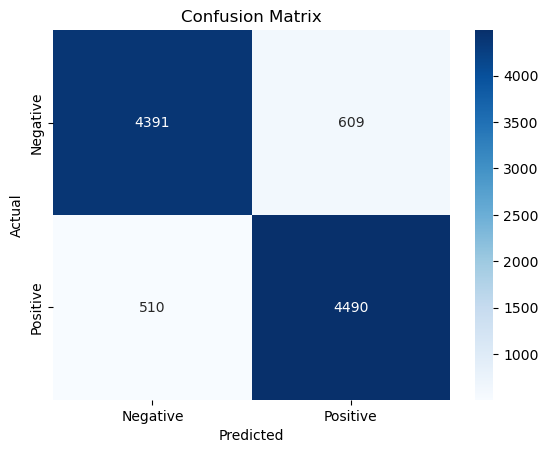

In [6]:
# Step 7: Evaluate the Model
y_pred = lr_model.predict(X_test_tfidf)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
